*This Notebook was created by Antoine Palisson*

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data Exploration

In [2]:
from sklearn.datasets import fetch_openml
data = fetch_openml('Adult-Census-Income', version=1, as_frame=True, parser='auto')
df = pd.concat([data['data'], data['target']], axis=1)
df['income'] = df['income'].map({'=50K':'>=50k','50K':'<50k'})
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,>=50k
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,>=50k
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,>=50k
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,>=50k
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,>=50k


The `income` target variable is the target of the adult dataset.

**<font color='blue'>1.a. What is the task of the dataset ? Is it a classification and a regression ?<br>1.b. What is the type of each feature ? Are they Nominal ? Ordinal ? Cyclical ? Numerical ?**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# The label is categorical with 2 classes --> binary classification
# age, fnlwgt, capital.gain, capital.loss and hours.per.week are numerical
# workclass, education, education.num, marital.status, occupation, relationship, race, sex and native.country are categorical nominal 

**<font color='blue'>2. Is there any missing values in the dataset ?**

In [5]:
# Occupation and workclass contain a lot of missing values
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

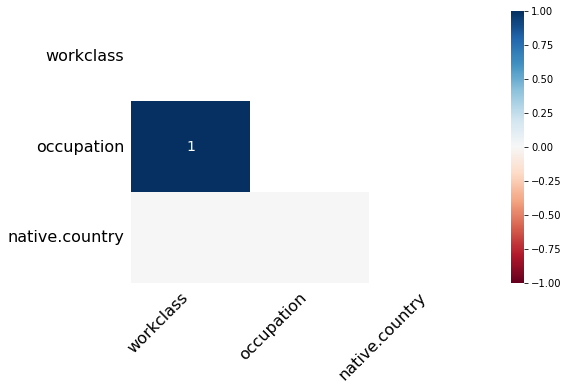

In [6]:
# Missingno can be used to check the correlation between the missing values
# The occupation and the workclass missing values are 100% correlated.
# native.country missing values are not correlated to the other features
import missingno as msno
msno.heatmap(df, figsize=(8,5))
plt.show()

In [7]:
# The missing values distribution looks random
# However, this assumption should be verified by comparing the distribution of the features
# of the native.country missing values and existing values
df[df['native.country'].isna()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,<50k
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,<50k
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,NaN,<50k
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,NaN,<50k
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,NaN,<50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,<50k
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,>=50k
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,>=50k
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,<50k


**<font color='blue'>3. Is there any duplicates in the dataset ?<br> If so, delete them.**

In [8]:
print(f"There are {df.duplicated().sum()} duplicated rows")
df[df.duplicated()]

There are 24 duplicated rows


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,>=50k
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,>=50k
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,>=50k
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,>=50k
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,>=50k
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,>=50k
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>=50k
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,>=50k
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,>=50k
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,>=50k


In [9]:
# Removing the duplicates
df = df.drop_duplicates()
df[df.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [10]:
# Education and education are the same columns
df = df.drop('education.num', axis=1)

**<font color='blue'>4. Is there any outliers ?<br>**

In [11]:
# Numerical data
num_col = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
zscore = abs((df[num_col] - df[num_col].mean())/df[num_col].std())

# There is a lot of outliers especially in the capital.loss column
print(f"|zscore| > 3\n{(zscore > 3).sum()}", end='\n\n')
print(f"|zscore| > 4\n{(zscore > 4).sum()}", end='\n\n')

|zscore| > 3
age                120
fnlwgt             346
capital.gain       215
capital.loss      1470
hours.per.week     440
dtype: int64

|zscore| > 4
age                  0
fnlwgt             122
capital.gain       166
capital.loss      1121
hours.per.week     139
dtype: int64



In [12]:
# Categorical data (see end of this part for conclusions)
cat_col = df.drop(num_col, axis=1).columns[:-1]

for col in cat_col:
    print(f"{col}\n{df[col].value_counts(normalize=True)}", end='\n\n')

workclass
Private             0.738510
Self-emp-not-inc    0.082733
Local-gov           0.068174
State-gov           0.042279
Self-emp-inc        0.036351
Federal-gov         0.031269
Without-pay         0.000456
Never-worked        0.000228
Name: workclass, dtype: float64

education
HS-grad         0.322525
Some-college    0.223807
Bachelors       0.164520
Masters         0.052924
Assoc-voc       0.042475
11th            0.036113
Assoc-acdm      0.032793
10th            0.028675
7th-8th         0.019824
Prof-school     0.017703
9th             0.015797
12th            0.013308
Doctorate       0.012693
5th-6th         0.010204
1st-4th         0.005102
Preschool       0.001537
Name: education, dtype: float64

marital.status
Married-civ-spouse       0.460092
Never-married            0.327842
Divorced                 0.136491
Separated                0.031503
Widowed                  0.030519
Married-spouse-absent    0.012847
Married-AF-spouse        0.000707
Name: marital.status, dtype: 

**<font color='blue'>5.a. Analyze the label using graphs and statistics.<br> Is the dataset balanced ?**

In [13]:
# The dataset is imbalanced
vc = df['income'].value_counts().to_frame(name='Count')
vc['Percentage'] = round(df['income'].value_counts(normalize=True),2)
vc

,Count,Percentage
>=50k,24698,0.76
<50k,7839,0.24


**<font color='blue'>5.b. Analyze the features one by one using graphs, statistics ...<br>**

In [14]:
# capital.gain may have a capped maximum and the mean is very low compared to the maximum
# capital.loss mean is very low compared to the maximum
# most of the hours.per.week values are 40 (Q1 & Q2 are 40)

df[num_col].describe()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


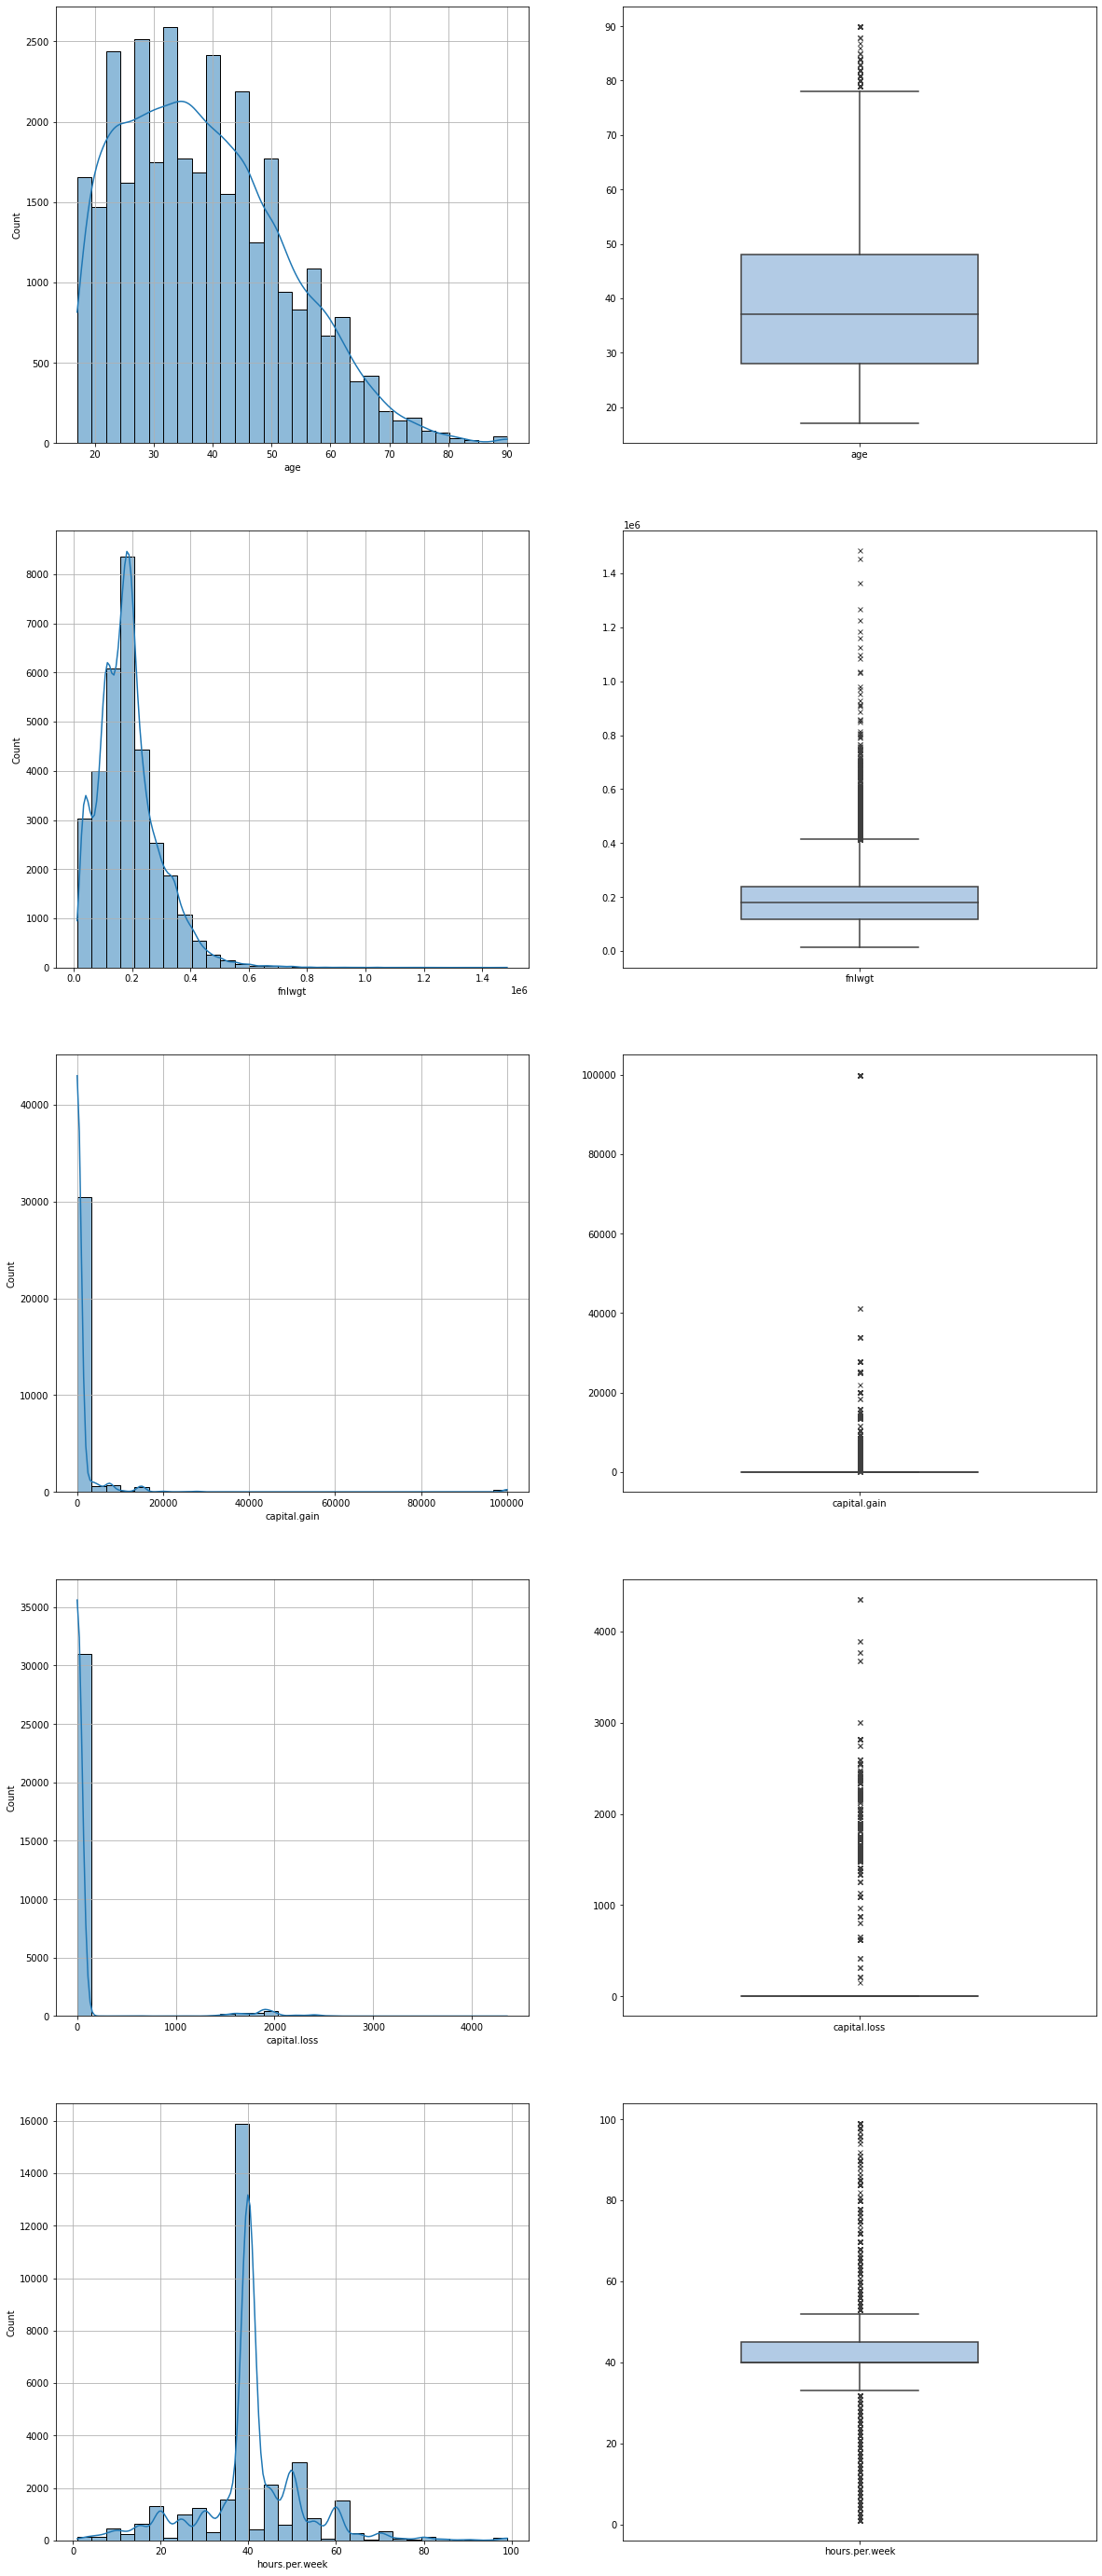

In [15]:
# capital.loss & capital.gain have a lot more zeros than other values
fig, axs = plt.subplots(len(num_col),2, figsize=(20,50))

for col, ax in zip(num_col, axs) :

    sns.histplot(df[col], 
                 bins=30, 
                 kde=True, 
                 ax=ax[0])
    ax[0].grid('on')
    sns.boxplot(df[[col]], 
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)}, 
                width=0.5, 
                ax=ax[1])

In [16]:
# capital.loss and capital.gain might not be very informative
print(f"{(df['hours.per.week']==40).sum()/len(df):.2%} of the hours.per.week values are equal to 40", end='\n\n')
print(f"{(df['capital.loss']==0).sum()/len(df):.2%} of the capital.loss values are equal to 0", end='\n\n')
print(f"{(df['capital.gain']==0).sum()/len(df):.2%} of the capital.gain values are equal to 0", end='\n\n')

46.73% of the hours.per.week values are equal to 40

95.33% of the capital.loss values are equal to 0

91.66% of the capital.gain values are equal to 0



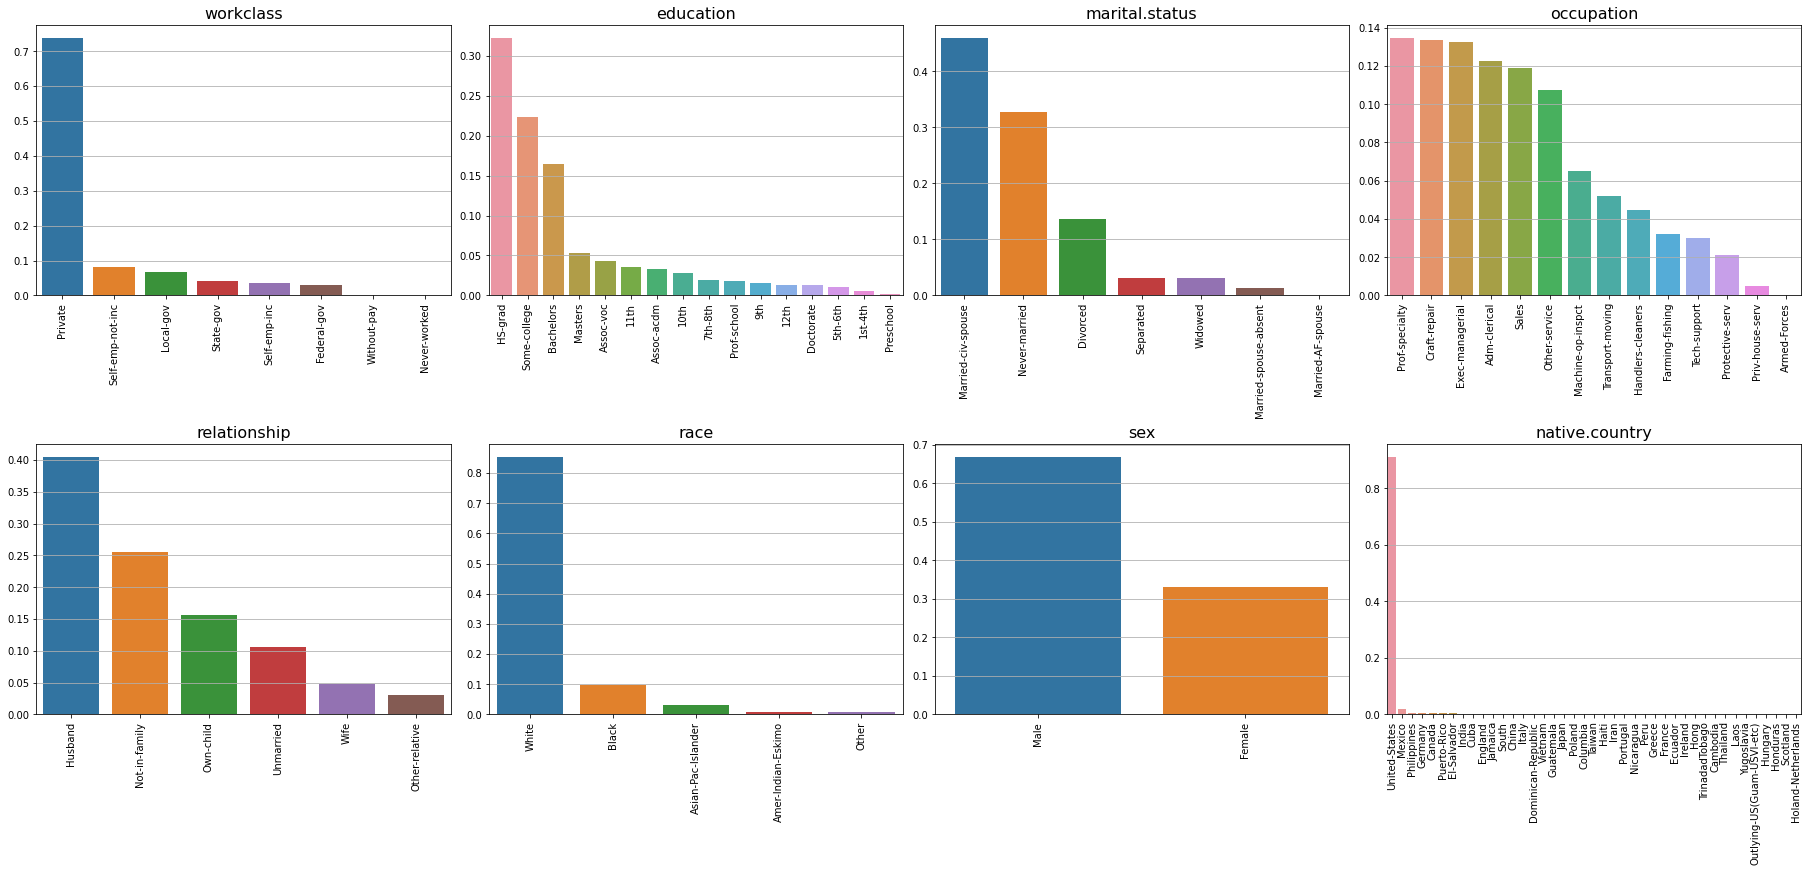

In [17]:
fig, axs = plt.subplots(2,4, figsize=(25,12), constrained_layout=True)

for col, ax in zip(cat_col, np.ravel(axs)) :

    vc = df[col].value_counts(normalize=True)
    g = sns.barplot(x=vc.index, y=vc.values, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.grid('on', axis='y')
    ax.set_title(col, fontsize=16)
plt.show()

**<font color='blue'>6.a. Analyze the relationships between the features using graphs, correlation ...<br>**

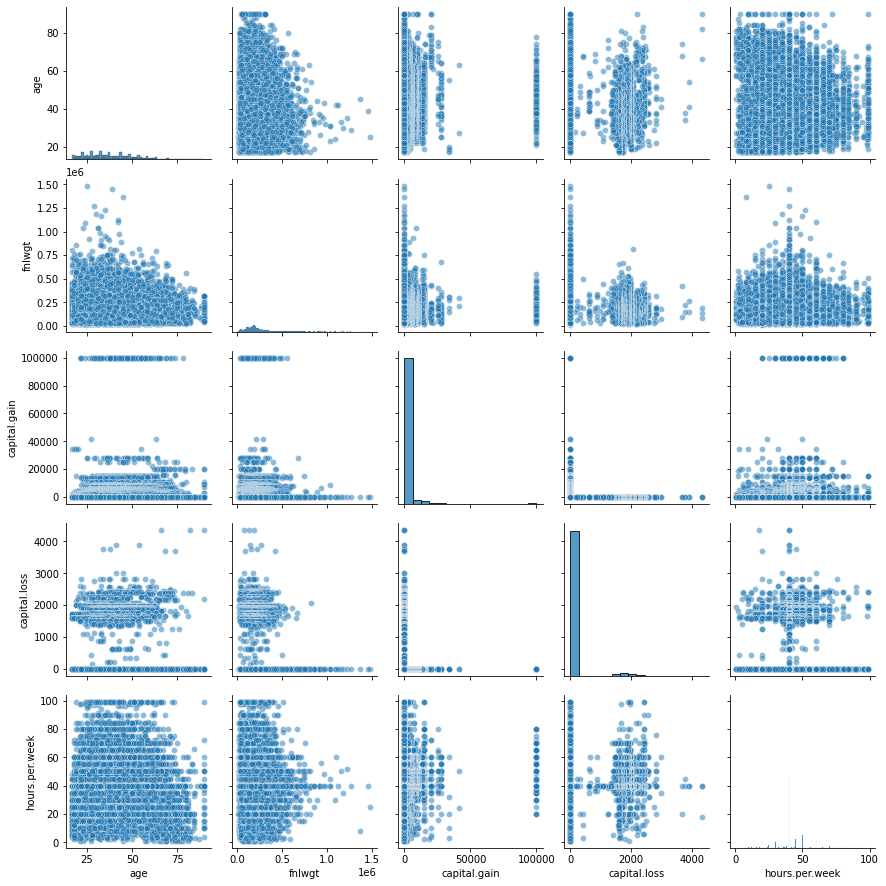

In [18]:
# There is probably no or little linear correlation between the features
sns.pairplot(df[num_col], plot_kws={'alpha':0.5})
plt.show()

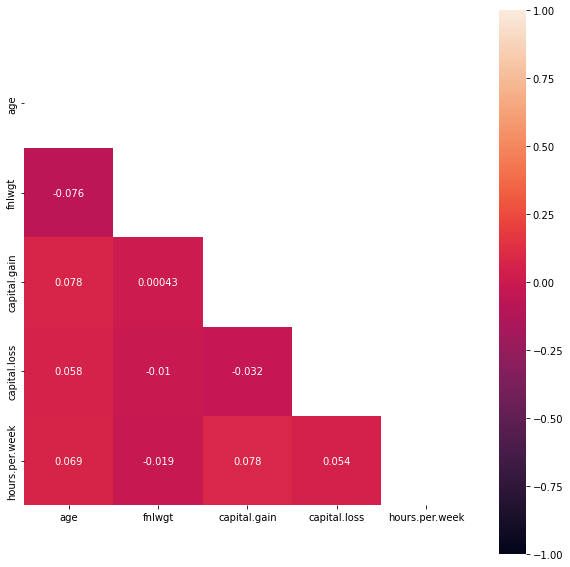

In [19]:
corr = df[num_col].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True, mask=np.triu(corr), ax=ax)
plt.show()

In [20]:
# There are major differences in the occupation feature between males and females
df.groupby('sex')['occupation'].value_counts(normalize=True)

sex     occupation       
Female  Adm-clerical         0.255519
        Other-service        0.181333
        Prof-specialty       0.152505
        Sales                0.127306
        Exec-managerial      0.116823
        Machine-op-inspct    0.055337
        Tech-support         0.034976
        Craft-repair         0.022377
        Handlers-cleaners    0.016531
        Priv-house-serv      0.014011
        Transport-moving     0.009072
        Protective-serv      0.007661
        Farming-fishing      0.006552
Male    Craft-repair         0.186396
        Exec-managerial      0.139893
        Prof-specialty       0.126270
        Sales                0.114909
        Transport-moving     0.072546
        Other-service        0.071824
        Machine-op-inspct    0.069850
        Adm-clerical         0.059356
        Handlers-cleaners    0.058008
        Farming-fishing      0.044625
        Tech-support         0.027921
        Protective-serv      0.027584
        Armed-Forces    

In [21]:
# There is little difference in education between males and females
df.groupby('sex')['education'].value_counts(normalize=True)

sex     education   
Female  HS-grad         0.314811
        Some-college    0.260361
        Bachelors       0.150344
        Masters         0.049805
        Assoc-voc       0.046460
        11th            0.040141
        Assoc-acdm      0.039119
        10th            0.027411
        7th-8th         0.014867
        12th            0.013380
        9th             0.013380
        Prof-school     0.008549
        Doctorate       0.007991
        5th-6th         0.007805
        1st-4th         0.004088
        Preschool       0.001487
Male    HS-grad         0.326338
        Some-college    0.205741
        Bachelors       0.171527
        Masters         0.054466
        Assoc-voc       0.040505
        11th            0.034122
        Assoc-acdm      0.029667
        10th            0.029300
        7th-8th         0.022273
        Prof-school     0.022227
        9th             0.016992
        Doctorate       0.015017
        12th            0.013272
        5th-6th       

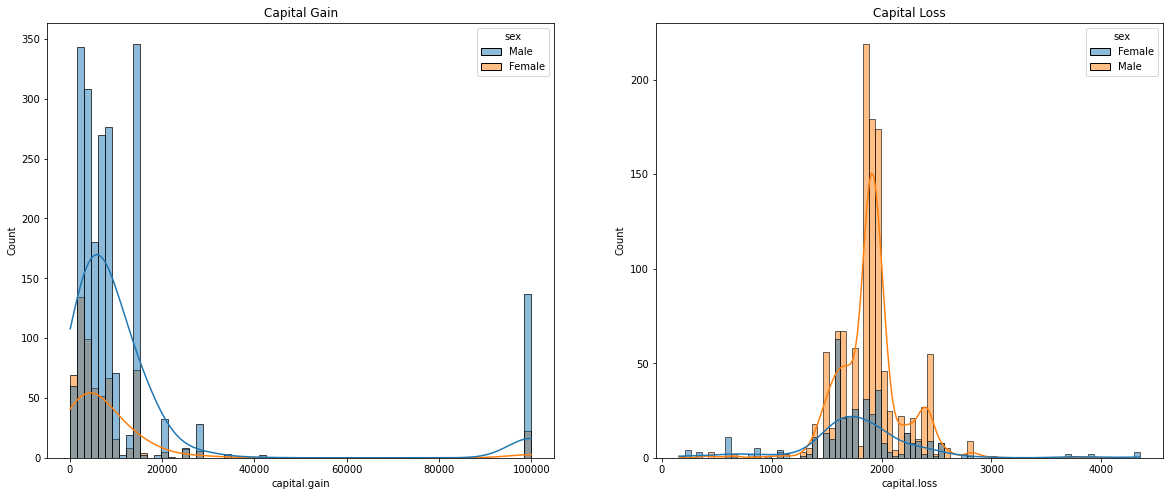

In [22]:
fig, axs = plt.subplots(1,2, figsize=(20,8))
g = sns.histplot(df[df['capital.gain'] != 0], x='capital.gain', hue='sex', kde=True, ax=axs[0])
axs[0].set_title('Capital Gain')
g = sns.histplot(df[df['capital.loss'] != 0], x='capital.loss', hue='sex', kde=True, ax=axs[1])
axs[1].set_title('Capital Loss')
plt.show()

In [23]:
# Slight differences : women earn and lose slightly often less
print(f"No Capital Gain - Female : {df[df['sex'] == 'Female']['capital.gain'].value_counts(normalize=True).loc[0]:.2%}")
print(f"No Capital Gain - Male   : {df[df['sex'] == 'Male']['capital.gain'].value_counts(normalize=True).loc[0]:.2%}")
print(f"No Capital Loss - Female : {df[df['sex'] == 'Female']['capital.loss'].value_counts(normalize=True).loc[0]:.2%}")
print(f"No Capital Loss - Male   : {df[df['sex'] == 'Male']['capital.loss'].value_counts(normalize=True).loc[0]:.2%}")

No Capital Gain - Female : 94.21%
No Capital Gain - Male   : 90.41%
No Capital Loss - Female : 96.57%
No Capital Loss - Male   : 94.72%


**<font color='blue'>6.b. Analyze the feature-label relationships using graphs, correlation ...<br>**

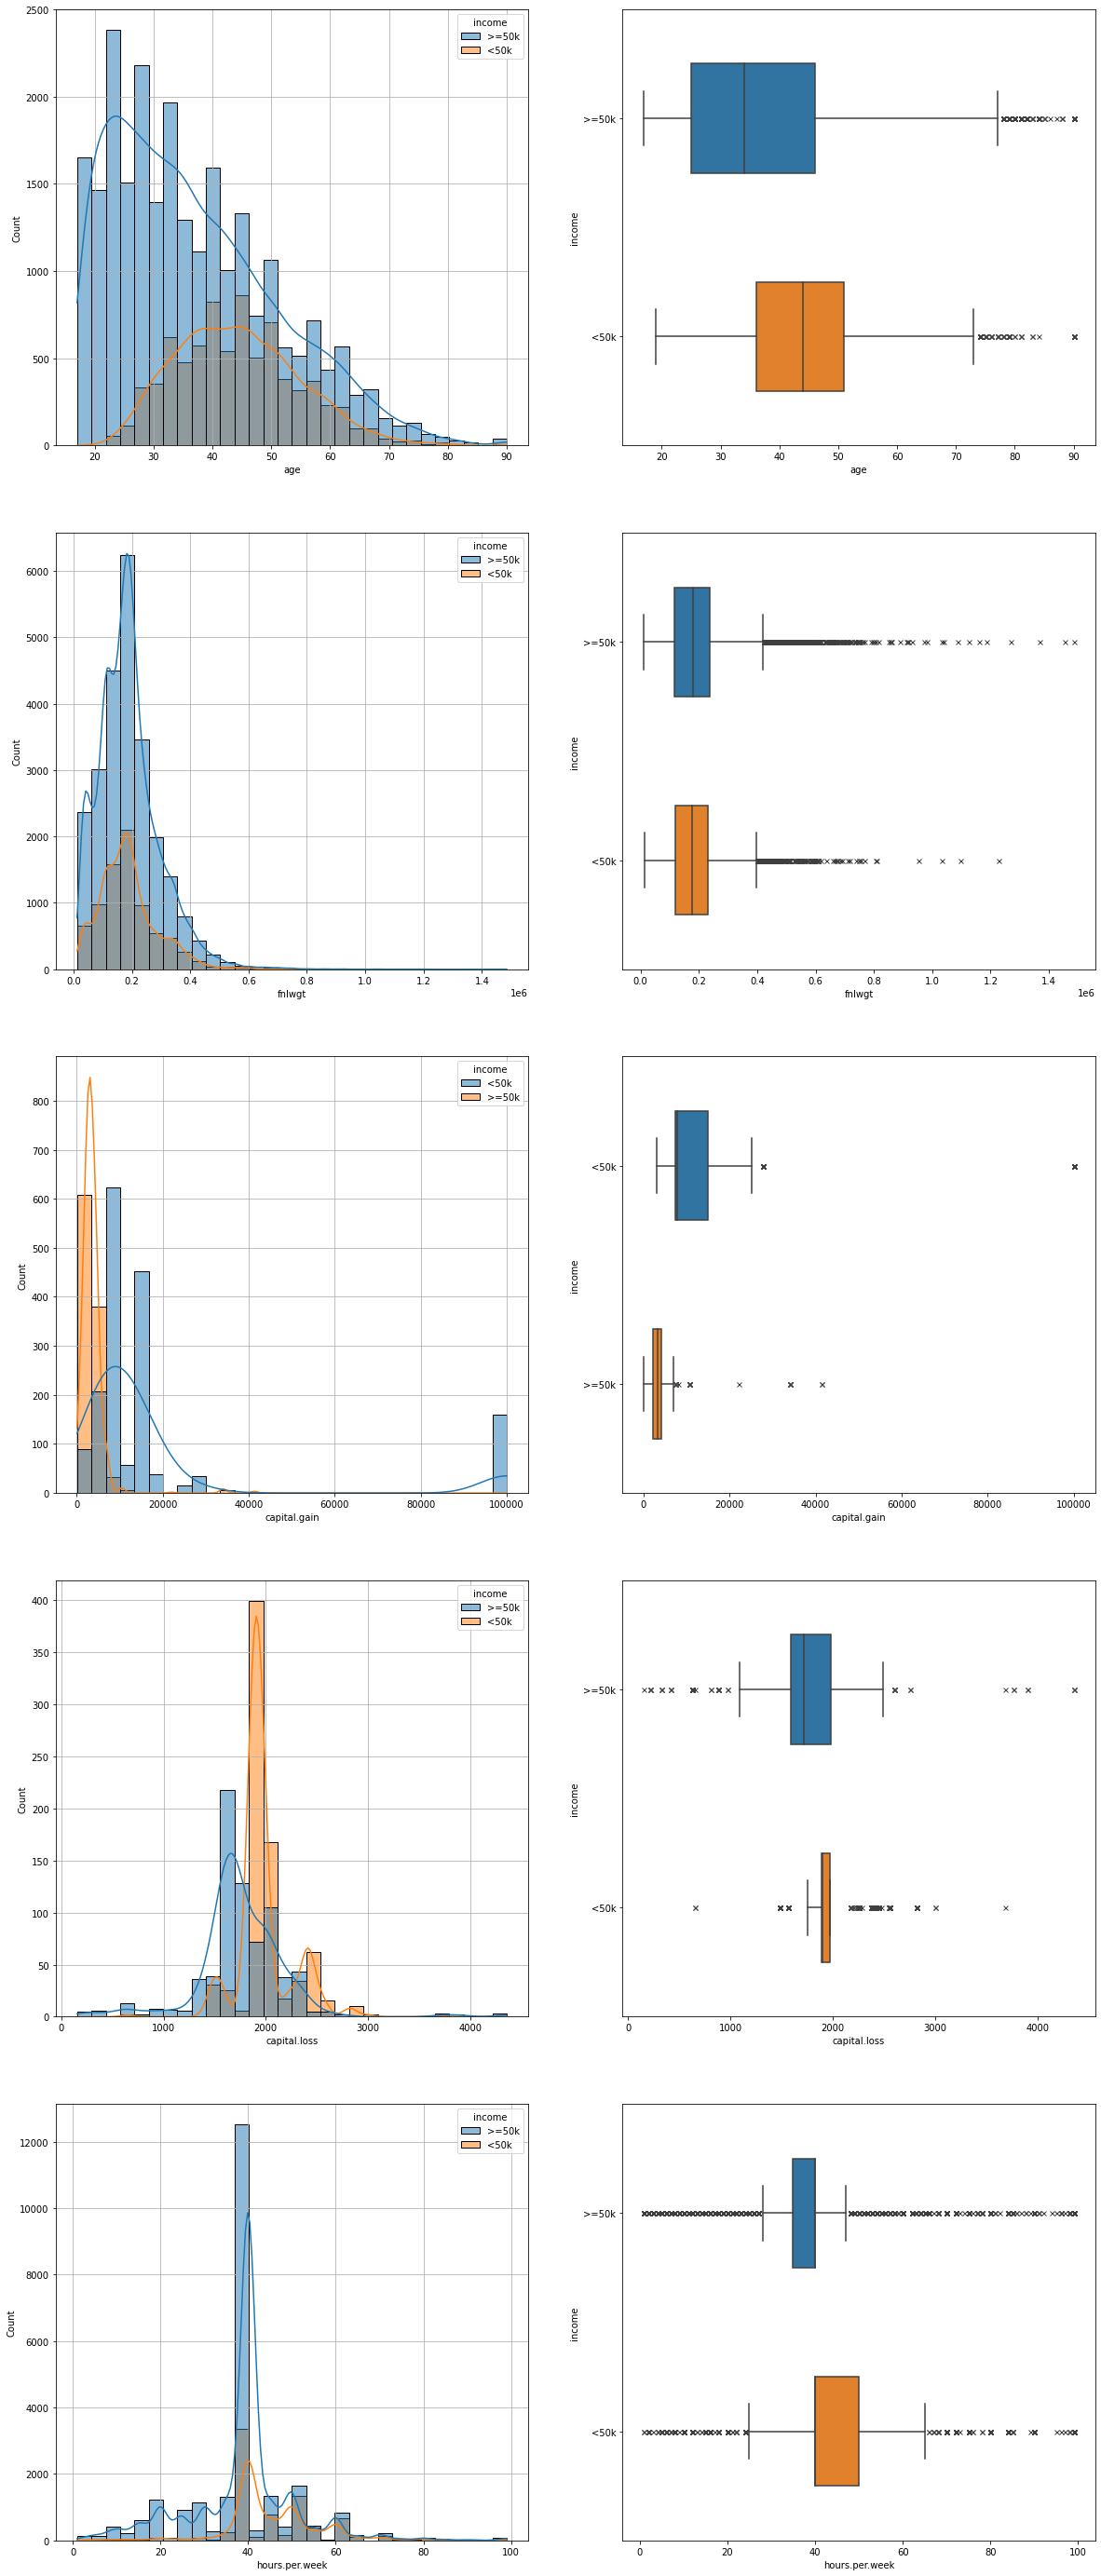

In [24]:
# The income seems to be moderately correlated to the age and the hours.per.week features
# The capital.gain and capital.loss values higher than 0 are correlated to the income label
fig, axs = plt.subplots(len(num_col),2, figsize=(20,50))

for col, ax in zip(num_col, axs) :

    if col == 'capital.gain' : df_temp = df[df['capital.gain'] != 0]
    elif col == 'capital.loss' : df_temp = df[df['capital.loss'] != 0]
    else : df_temp = df.copy()

    sns.histplot(df_temp, 
                 x=col,
                 hue='income',
                 bins=30, 
                 kde=True, 
                 ax=ax[0])
    
    ax[0].grid('on')
    sns.boxplot(df_temp, 
                x=col,
                y='income',
                flierprops={"marker": "x"},
                width=0.5, 
                ax=ax[1])

plt.show()

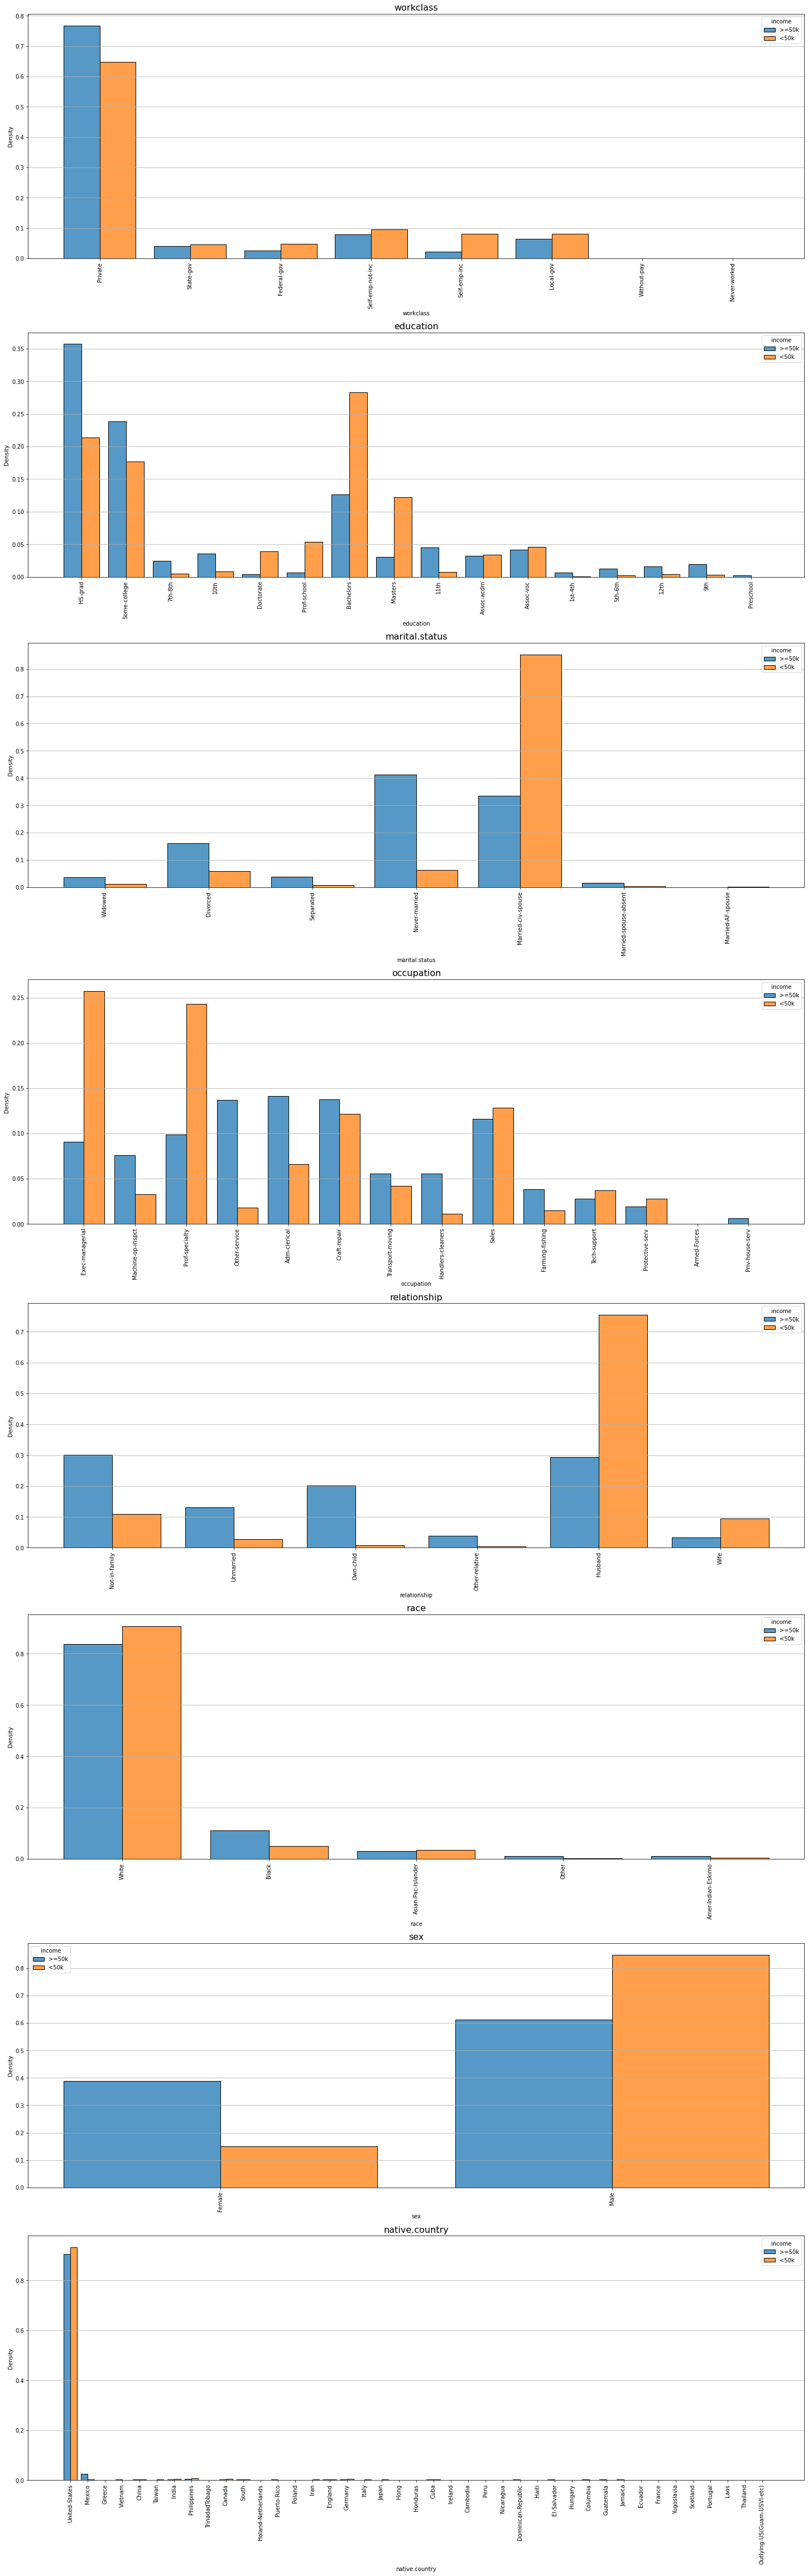

In [26]:
fig, axs = plt.subplots(len(cat_col), 1, figsize=(20, len(cat_col)*8), constrained_layout=True )

for col, ax in zip(cat_col, np.ravel(axs)):

    sns.histplot(x=df[col], hue=df['income'], multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.grid('on', axis='y')
    ax.set_title(col, fontsize=16)

plt.show()

Some conclusions about the **outliers**:

---

**Categorical**

*   workclass : without-pay & never-worked --> create a new class "no work"
*   education : Preschool & 1st-4th --> merge them with 5th-6th
*   marital.status : Married-AF-spouse --> merge into married-civ-spouse
*   occupation : Priv-house-serv & Armed-Forces --> merge in other-service
*   race : Amer-Indian-Eskimo & Other --> merge in other
*   native.country : 91% US and the remainder are outliers --> merge every outlier into a non-US category

---

**Numerical**

*  hours.per.week : keep the outliers
*  capital.loss : keep the outliers because they are correlated to the label
*  capital.gain : keep the outliers because they are correlated to the label

# Data Preprocessing

**<font color='blue'>1.a. Split the dataset into the features (X) and the label (y).**

In [84]:
X = df.copy()
y = X.pop('income')

In [190]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
y = lbl.fit_transform(y)

**<font color='blue'>1.b. Split the dataset into a training and a testing set.**

*Tips: There is no need for a validation set in this exercise because you will use the cross validation.<br>You should stratify when the dataset is imbalanced.*

In [191]:
from sklearn.model_selection import train_test_split

test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,           
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=42)

In [204]:
vc = pd.Series(y_train, name='y_train').value_counts(normalize=True).to_frame()
vc['y_test'] = pd.Series(y_test).value_counts(normalize=True)
vc

,y_train,y_test
1,0.759076,0.759066
0,0.240924,0.240934


**<font color='blue'>2. Handle the missing values.**

In [192]:
def nan_imputer(X):
    X['workclass'] = X['workclass'].fillna("No workclass")
    X['occupation'] = X['occupation'].fillna("No occupation")
    X['native.country'] = X['native.country'].fillna("Other")
    return X

**<font color='blue'>3. Handle the outliers**

In [193]:
def outlier_imputer(X):
    X['workclass'] = X['workclass'].replace({"Without-pay" :"no-work",
                                             "Never-worked" :"no-work"})
    X['education'] = X['education'].replace({"Preschool": "<6th",
                                             "1st-4th": "<6th",
                                             "5th-6th": "<6th"})
    X['marital.status'] = X['marital.status'].replace({"Married-AF-spouse" : "Married-civ-spouse"})
    X['occupation'] = X['occupation'].replace({"Priv-house-serv" : "Other-service",
                                               "Armed-Forces": "Other-service"})
    X['race'] = X['race'].replace({'Amer-Indian-Eskimo':'Other'})
    X.loc[X['native.country'] != 'United-States', 'native.country'] = 'Other'
    return X

**<font color='blue'>4. Preprocess the categorical features using the correct method.**

In [194]:
# Categorical preprocessing = nan + outliers + one hot encoding
# see question 6

**<font color='blue'>5. Preprocess the numerical features using the correct method.**


In [195]:
# Numerical preprocessing 
# StandardScaler for hours.per.week, fnlwgt and age 
# MinMaxScaler for capital.gain &  capital.loss to keep the 0's at 0
# see question 6

**<font color='blue'>6. Merge the preprocessing steps using `ColumnTransformer` and `Pipeline`.**

*Tips: Refer to the previous Notebook for the ColumnTransformer and Pipeline instructions.*

In [196]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer,  
                                   StandardScaler, 
                                   MinMaxScaler, 
                                   OneHotEncoder)

cat_transformer = Pipeline([('nan', FunctionTransformer(nan_imputer)),
                            ('out', FunctionTransformer(outlier_imputer)),
                            ('ohe', OneHotEncoder())])

ct = ColumnTransformer([('num_1', StandardScaler(), ['age', 'fnlwgt', 'hours.per.week']),
                        ('num_2', MinMaxScaler(), ['capital.gain', 'capital.loss']),
                        ('cat', cat_transformer, cat_col)],
                       sparse_threshold=0)                    # Outputs a numpy array all the time

# Preprocessing
X_train_f = ct.fit_transform(X_train)
X_test_f = ct.transform(X_test)

# Convert into dataframe
# ct.named_transformers_.cat is refering to the 'cat' cat_transformer of the columntransformer
# ct.named_transformers_.cat.named_steps.ohe is refering to the OneHotEncoder is the cat_transformer
# ct.named_transformers_.cat.named_steps.ohe.get_feature_names_out() extracts the feature names of the fitted OneHotEncoder
col_names = np.concatenate([['age', 'fnlwgt', 'hours.per.week'], ['capital.gain', 'capital.loss'], ct.named_transformers_.cat.named_steps.ohe.get_feature_names_out()], axis=0)

X_train_f = pd.DataFrame(X_train_f, columns=col_names)
X_test_f = pd.DataFrame(X_test_f, columns=col_names)

# Model Selection

The Logistic Regression model is a supervised learning algorithm used for binary classification problems where the target variable can take only two values.

You can find the `LogisticRegression` model on the sklearn library, [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Some of the most important hyperparameters include:

* **`penalty`**: *This parameter controls the type of regularization used in the model. The two options are "l1" and "l2". L1 regularization adds a penalty proportional to the absolute value of the coefficients, while L2 regularization adds a penalty proportional to the square of the coefficients. L1 regularization can be used to perform feature selection by setting some coefficients to zero, while L2 regularization tends to lead to smaller and more evenly distributed coefficients. Generally, L2 regularization is more commonly used and performs well in most situations.*
* **`C`**: *It is the inverse of the regularization strength, with smaller values of C indicating stronger regularization. A higher value of C allows the model to fit the training data more closely, while a lower value of C leads to more regularization and a simpler model. The optimal value of C depends on the particular dataset and the degree of complexity of the model that is required. A larger value of C could lead to overfitting while a smaller value of C could lead to underfitting.*
* **`solver`**: *This parameter specifies the algorithm used to optimize the model. Different solvers have different tradeoffs between speed and accuracy, and the optimal choice depends on the size of the dataset and the complexity of the model. The "liblinear" solver is a good choice for small datasets, while the "lbfgs" and "newton-cg" solvers are better suited for larger datasets. The "sag" and "saga" solvers are especially well-suited for large datasets with many features.*
* **`max_iter`**: *This parameter sets the maximum number of iterations for the solver to converge. If the solver has not converged after the maximum number of iterations, it will stop and return the best solution found so far. In general, larger datasets require more iterations to converge, so this parameter should be set appropriately.*

**<font color='blue'>1.a. Train a LogisticRegression model on the training set.**

In [235]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_f, y_train)

LogisticRegression(max_iter=1000, random_state=42)

The `LogisticRegression` class in sklearn has many attributes.<br>Here are some of the most important ones:

*  **`coef_`**: *This attribute returns an array of shape (1, n_features) or (n_classes, n_features) containing the estimated coefficients of the logistic regression model. For binary classification problems, this will be a 1D array of coefficients. For multi-class problems, there will be a separate row of coefficients for each class.*
*  **`intercept_`**: *This attribute returns an array of shape (1,) or (n_classes,) containing the estimated intercepts (or biases) of the logistic regression model. For binary classification problems, this will be a scalar value. For multi-class problems, there will be a separate intercept for each class.*

**<font color='blue'>1.b. Use the `.coef_` attributes to get the coefficient for each feature of the logistic regression.<br> Which feature seems to be the most important for the task ?**

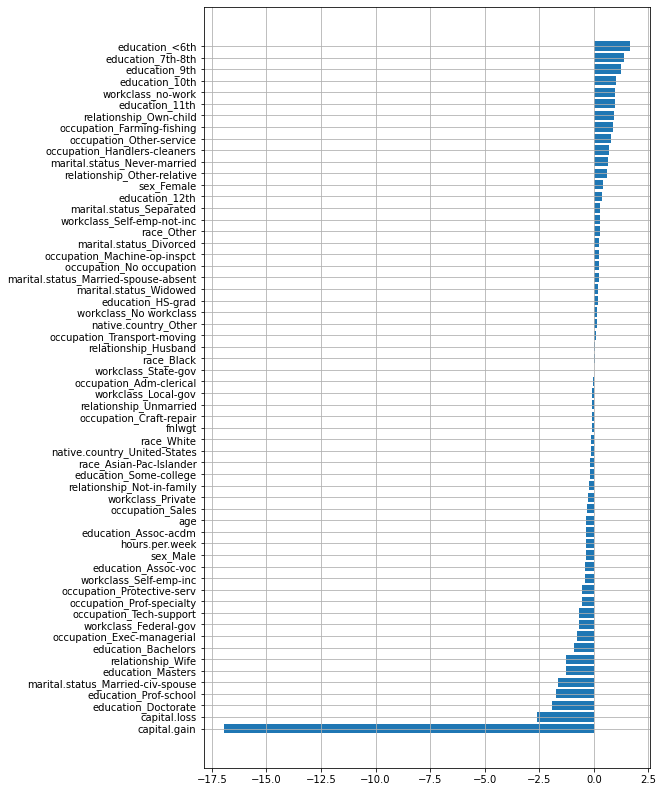

In [236]:
# It seems that the capital.loss and especially the capital.gain features have a major effect on the label when they are different than 0
# --> it might be interesting to create new features based on them.
# Education and especially < 11th, Prof School and Doctorate also seems to have a significant effect on the label
plt.figure(figsize=(8,14))
idx = np.argsort(logreg.coef_[0])
plt.barh(X_train_f.columns[idx], logreg.coef_[0,idx])
plt.grid('on')
plt.show()

The `LogisticRegression` class in sklearn has many methods.<br>Here are some of the most important ones:

* **`fit()`**: fits the logistic regression model to the training data X and labels y
* **`predict()`**: predicts the class labels for new data X.
* **`predict_proba()`**: predicts the probabilities of the class labels for new data X.
* **`score()`**: computes the mean accuracy of the logistic regression model on the given test data X and labels y

**<font color='blue'>1.c. Get the accuracy using the `.score()` function on the training set.**

In [237]:
print(f"The accuracy on the training set is {logreg.score(X_train_f, y_train):.3%}")

The accuracy on the training set is 85.182%


**<font color='blue'>1.d. Predict the label of the training set using the `.predict()` method.**

In [238]:
y_pred = logreg.predict(X_train_f)

Sklearn has many classification metrics including:

*   Accuracy - [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
*   Precision - [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
*   Recall - [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
*   f1-score - [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

**<font color='blue'>1.e. Using the prediction made at the previous question, compute the accuracy, the precision, the recall and the f1-score on the training set.**

In [242]:
from sklearn.metrics import (accuracy_score, 
                             precision_score,
                             recall_score,
                             f1_score)

print(f"The accuracy on the training set is  : {accuracy_score(y_train, y_pred):.3%}", end='\n\n')

# The positive class is >= 50k
print('Positive class is >= 50k')
print(f"The precision on the training set is : {precision_score(y_train, y_pred):.3%}")
print(f"The recall on the training set is    : {recall_score(y_train, y_pred):.3%}")
print(f"The f1-score on the training set is  : {f1_score(y_train, y_pred):.3%}", end='\n\n')

# The positive class is <50k
print('Positive class is <50k')
print(f"The precision on the training set is : {precision_score(y_train, y_pred, pos_label=0):.3%}")
print(f"The recall on the training set is    : {recall_score(y_train, y_pred, pos_label=0):.3%}")
print(f"The f1-score on the training set is  : {f1_score(y_train, y_pred, pos_label=0):.3%}", end='\n\n')

The accuracy on the training set is  : 85.182%

Positive class is >= 50k
The precision on the training set is : 87.995%
The recall on the training set is    : 93.193%
The f1-score on the training set is  : 90.519%

Positive class is <50k
The precision on the training set is : 73.648%
The recall on the training set is    : 59.943%
The f1-score on the training set is  : 66.092%



**<font color='blue'>2.a. Merge the preprocessing steps and the model using the `Pipeline`.**

*Tips: Refer to the previous Notebook for the Pipeline instructions.*

In [206]:
pipe = Pipeline([('preprocessing', ct),
                 ('model', logreg)])
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num_1', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'hours.per.week']),
                                                 ('num_2', MinMaxScaler(),
                                                  ['capital.gain',
                                                   'capital.loss']),
                                                 ('cat',
                                                  Pipeline(steps=[('nan',
                                                                   FunctionTransformer(func=<function nan_imputer at 0x7fc23b18d040>)),
                                                                  ('out',
                                                                   FunctionTransformer(func=<function outlier_imputer at 0x7fc23b18d820>)),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

**<font color='blue'>2.b. Do a cross validation method with 5 folds with the `cross_val_score` function from sklearn on the LogisticRegression using a f1-score.**

*Tips: Refer to the previous Notebook for the cross-validation instructions.*

In [211]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(pipe,
                        X_train,
                        y_train,
                        cv=3,
                        scoring='f1')

print(f"The mean f1-score on the 5 validation folds is  : {np.mean(score):.3%} +/- {np.std(score):.3%}")

The mean f1-score on the 5 validation folds is  : 90.398% +/- 0.307%


The `LearningCurveDisplay` class from the `sklearn.model_selection` module is a tool for visualizing the learning curve generated by the `learning_curve` function or by its `.from_estimator()` method. You can find it [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html#sklearn.model_selection.LearningCurveDisplay.from_estimator).

The simplest way to use the `LearningCurveDisplay` class is to use its `from_estimator()` method. It allows you to generate a learning curve plot directly from an estimator, without having to use the `learning_curve` function directly. It also use a cross-validation method to compute the score.

Here are the parameters of the `from_estimator()` method:

* **`estimator`**: *The machine learning model to use.*
* **`X`**: *The features of the training data.*
* **`y`**: *The label of the training data.*
* **`cv`**: *The cross-validation strategy to use. If cv is an integer value, it specifies the number of folds to use in k-fold cross-validation. If cv is a cross-validation generator, it specifies a custom cross-validation strategy to use.*
* **`train_sizes`**: *An array of training set sizes to use for the learning curve. It specifies the number of training data to use to compute the scores. By default, it will take 10%, 32.5%, 55%, 77.5% and 100%.*
* **`scoring`**: *The metric used to compute the learning curves.*
* **`score_type`**: *The type of score to plot. It can be “test” to display the testing score curve, “train” to display the training score or “both” to display both training and testing scores.*
* **`shuffle`**: *If set to True, it shuffles the data before sampling the instances with the train_sizes steps.*

```
disp = LearningCurveDisplay.from_estimator(model, 
                                           X, 
                                           y,
                                           cv, ...)
plt.show()
```

**<font color='blue'>3. Display the learning curves of the Logistic Regression.<br>Is the model overfitting ? Underfitting ?**

*Tips: Similarly to a cross-validation, you need to merge the preprocessing steps and the model using the Pipeline and the ColumnTransformer classes from sklearn, and use that as the 'model' in the `from_estimator()` method.*

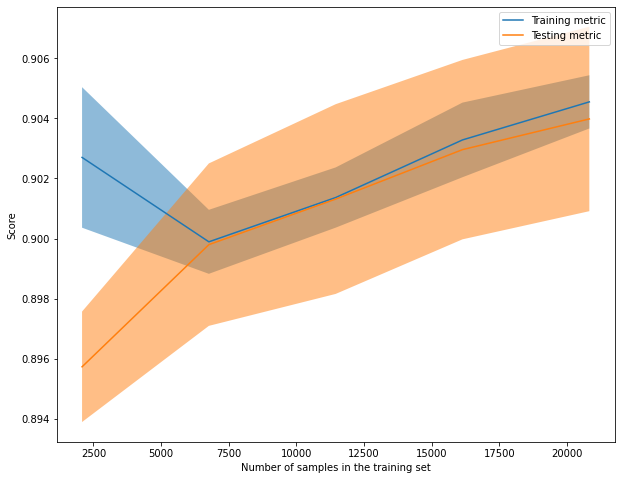

In [218]:
# No overfitting
from sklearn.model_selection import LearningCurveDisplay

fig, ax = plt.subplots(figsize=(10,8))
disp = LearningCurveDisplay.from_estimator(pipe, 
                                           X_train, 
                                           y_train,
                                           cv=5,
                                           scoring='f1',
                                           score_type='both',
                                           ax=ax)
plt.show()

Decision Trees, Support Vector Machine and k-nearest neighbors can be used for both classification and regression.

The classification Decision Tree algorithm can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).<br>
The classification Support Vector Machine algorithm can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).<br>
The classification k-Nearest Neighbors algorithm can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).


**<font color='blue'>4.a. Do a cross validation with the `DecisionTreeClassifier`, the `SVC` and the `KNeighborsClassifier` models.**

*Tips: Don't forget to use the same metric and number of folds for each cross-validation.*

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

pipe_dtc = Pipeline([('preprocessing', ct),
                     ('model', DecisionTreeClassifier(random_state=42))])
pipe_svc = Pipeline([('preprocessing', ct),
                     ('model', SVC(random_state=42))])
pipe_knc = Pipeline([('preprocessing', ct),
                     ('model', KNeighborsClassifier())])

score_dtc = cross_val_score(pipe_dtc,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='f1')
score_svc = cross_val_score(pipe_svc,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='f1')
score_knc = cross_val_score(pipe_knc,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='f1')

**<font color='blue'>4.b. Compare the model cross validation scores.<br> Which one is the best ?**

*Tips: Analyze the mean and the standard deviation of the scores for each model.*

In [221]:
print(f"Decision Tree - The mean f1-score is           : {np.mean(score_dtc):.3%} +/- {np.std(score_dtc):.3%}")
print(f"Support Vector Machine - The mean f1-score is  : {np.mean(score_svc):.3%} +/- {np.std(score_svc):.3%}")
print(f"k-Neighbors - The mean f1-score is             : {np.mean(score_knc):.3%} +/- {np.std(score_knc):.3%}")

Decision Tree - The mean f1-score is           : 87.797% +/- 0.265%
Support Vector Machine - The mean f1-score is  : 90.035% +/- 0.217%
k-Neighbors - The mean f1-score is             : 88.191% +/- 0.486%


**<font color='blue'>4.c. Display the learning curves of the models.<br> Are they overfitting ? Underfitting ?**

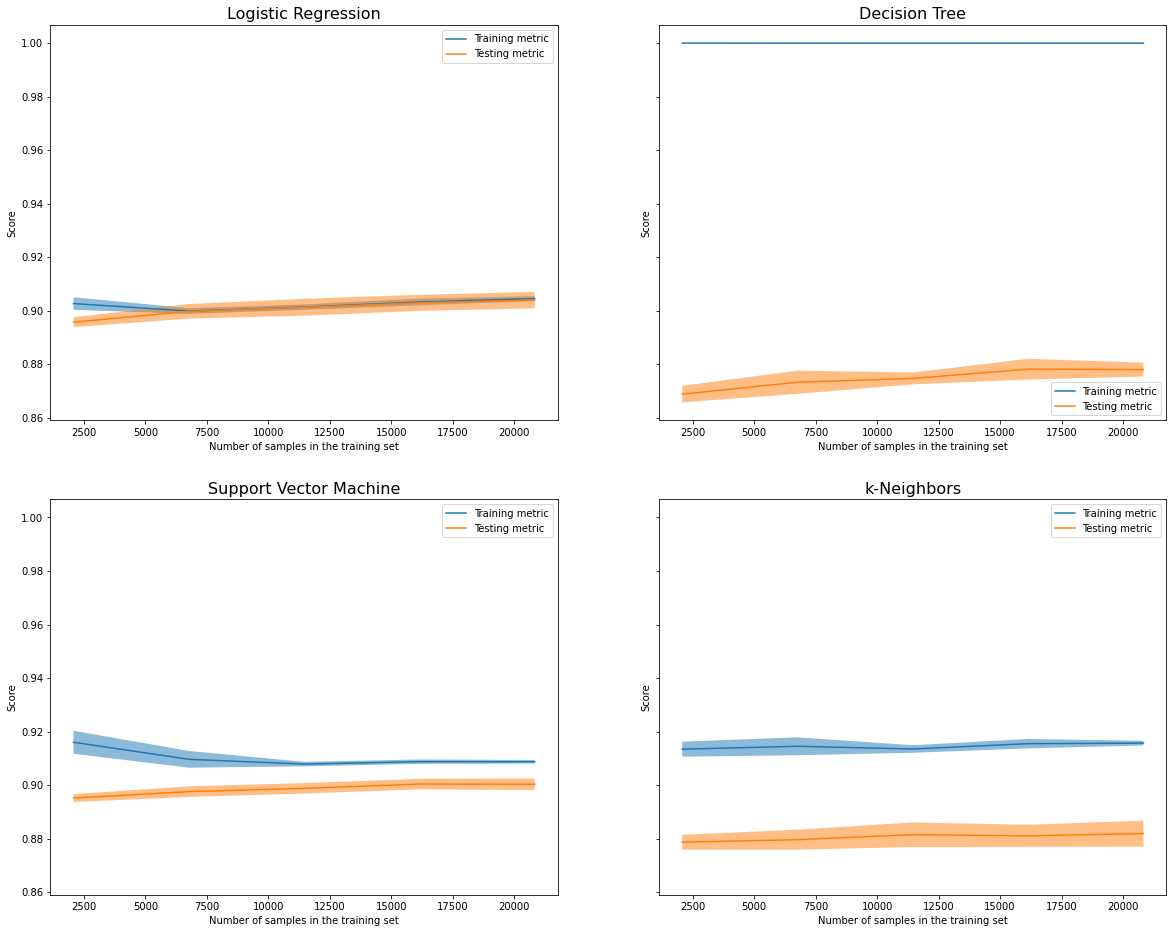

In [223]:
# Decision Tree is highly overfitting
# k-Neighbors is moderately overfitting
def learning_curves(pipe, ax, name):
    disp = LearningCurveDisplay.from_estimator(pipe, 
                                               X_train, 
                                               y_train,
                                               cv=5,
                                               scoring='f1',
                                               score_type='both',
                                               ax=ax)
    ax.set_title(name, fontsize=16)
    return disp

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(20,16))

learning_curves(pipe, axs[0,0], name='Logistic Regression')
learning_curves(pipe_dtc, axs[0,1], name='Decision Tree')
learning_curves(pipe_svc, axs[1,0], name='Support Vector Machine')
learning_curves(pipe_knc, axs[1,1], name='k-Neighbors')

plt.show()

**<font color='blue'>5.a. Re-train the best model and predict the labels of the testing set using the `predict()` method.**

In [243]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

The **`ConfusionMatrixDisplay`** class is a tool in scikit-learn for visualizing a confusion matrix generated by the **`confusion_matrix`** function.<br> You can find the **`ConfusionMatrixDisplay`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) and the **`confusion_matrix`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Here are some of the most important parameters of the `confusion_matrix` function:

* **`y_true`**: *The true class labels.*
* **`y_pred`**: *The predicted class labels.*
* **`labels`**: *The class labels to include in the confusion matrix. It can be a list of names of the label classes.*
* **`normalize`**: *If set to True, the confusion matrix will be normalized to show the proportions of correct and incorrect predictions for each class. If set to 'true', the confusion matrix is normalized by the true class values. If set to 'pred', the confusion matrix is normalized by the predicted class values.
If set to 'all', the confusion matrix will be normalized by the total number of samples.*

The output of the confusion_matrix can already be analyzed. However, analyzing a numpy ndarray can be difficult if the number of classes in the label is large.Thus the **`ConfusionMatrixDisplay`** can be used to generate a table visualization of the confusion matrix.

```
cm = confusion_matrix(...)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, ...)
disp.plot()
plt.show()
```


**<font color='blue'>5.b. Compute a confusion matrix on the testing set predictions.<br> Explain the confusion matrix.**

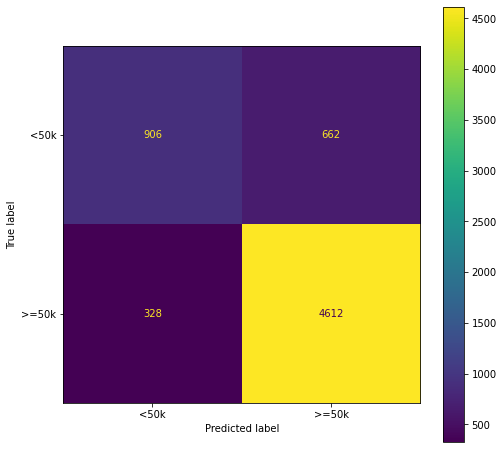

In [244]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8,8))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbl.classes_)
disp.plot(ax=ax)

plt.show()

**<font color='blue'>6.a. Predict the label probabilities of the testing set using the `predict_proba()` method.<br> Explain the output.**

In [246]:
# Each instance has two values:
# --> The first one is the probability for the negative class
# --> The second one is the probability for the positive class
y_pred_pb = pipe.predict_proba(X_test)
y_pred_pb

array([[0.08250198, 0.91749802],
       [0.85694597, 0.14305403],
       [0.01517414, 0.98482586],
       ...,
       [0.55144477, 0.44855523],
       [0.01072266, 0.98927734],
       [0.01558403, 0.98441597]])

The **`RocCurveDisplay`** class in scikit-learn is a tool for visualizing the Receiver Operating Characteristic (ROC) curve of a binary classifier using the **`roc_curve`** and the **`roc_auc_score`** functions.<br> You can find the **`RocCurveDisplay`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) , **`roc_curve`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and the **`roc_auc_score`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).



---


The ROC curve can be calculated using the **`roc_curve`** function. It has some parameters such as:

* **`y_true`**: *The true class labels.*
* **`y_pred`**: *The predicted class labels. It should be given to the function as probabilities.*
* **`pos_label`**: *The label of the positive class. If the positive class is not set to 1, you can set the value here.*

The `roc_curve` function returns three arrays:

* **`fpr`**: An array of the False Positive Rate (FPR) values for the different discrimination thresholds.
* **`tpr`**: An array of the True Positive Rate (TPR) values for the different discrimination thresholds.
* **`thresholds`**: An array of the discrimination thresholds used to calculate the FPR and TPR values.

---

The AUC score can be calculated using the **`roc_auc_score`** function. It has some parameters such as:
* **`y_true`**: *The true class labels.*
* **`y_pred`**: *The predicted class labels. It should be given to the function as probabilities.*
* **`average`**: *It specifies how to aggregate the AUC-ROC scores for each individual class to obtain an overall score.*
 *  *When average is set to None, the function returns an array of AUC-ROC scores, one for each class.*
 *  *When average is set to `'macro'`, the function calculates the AUC-ROC score for each class and returns their unweighted mean.*
 *  *When average is set to `'weighted'`, the function calculates the AUC-ROC score for each class and returns their weighted mean, where the weights are proportional to the number of samples in each class.*
 *  *When the average parameter is set to `'micro'`, the function calculates the AUC-ROC score globally by treating all classes and all samples equally.* 
 *  *When the average parameter is set to `'samples'`, the function calculates the AUC-ROC score for each sample, and then returns the average score across all samples.*

Additionally, the AUC score can be calculated using the `auc` function. It takes the FPR and the TPR as inputs and returns the AUC score. Fortunately, the FPR and the TPR are calculated by the `roc_curve` function.

---

The **`RocCurveDisplay`** class can then be used to create the ROC curve and display the AUC score on it.

```
fpr, tpr, thresholds = roc_curve(...)
roc_auc = roc_auc_score(...)
disp = RocCurveDisplay(fpr=fpr, 
                       tpr=tpr, 
                       roc_auc=roc_auc)
disp.plot()
plt.show()
```

**<font color='blue'>6.b. Compute the AUC score and display the ROC curve.**

*Tips: Add the Random Model curve.*

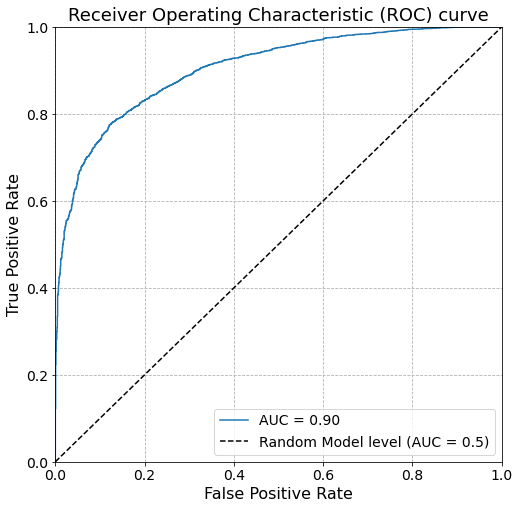

In [250]:
from sklearn.metrics import (roc_curve, 
                             roc_auc_score, 
                             RocCurveDisplay)

fig, ax = plt.subplots(figsize=(8,8))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_pb[:,1])
roc_auc = roc_auc_score(y_test, y_pred_pb[:,1])
disp = RocCurveDisplay(fpr=fpr, 
                       tpr=tpr, 
                       roc_auc=roc_auc)
disp.plot(ax=ax)
ax.plot([0, 1], [0, 1], "k--", label="Random Model level (AUC = 0.5)")

ax.set_title("Receiver Operating Characteristic (ROC) curve", fontsize=18)
ax.grid(linestyle="--")
ax.set_ylabel("True Positive Rate", fontsize=16)
ax.set_xlabel("False Positive Rate", fontsize=16)
ax.tick_params(labelsize=14)
ax.set_ylim([0,1])
ax.set_xlim([0,1])

plt.legend(fontsize=14)
plt.show()

The **`precision_recall_curve`** function in scikit-learn is a tool for visualizing the Precision-Recall curve of a binary classifier.<br> You can find it [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve).

Here are the most important parameters of the `precision_recall_curve` function:

* **`y_true`**: *The true binary class labels.*
* **`probas_pred`**: *The predicted probability scores for the positive class.*
* **`pos_label`**: *The label of the positive class. If the positive class is not set to 1, you can set the value here.*
* **`sample_weight`**: *An optional array of weights to apply to the samples.*

The `precision_recall_curve` function returns three arrays:

* **`precision`**: *An array of the precision values for the different probability thresholds.*
* **`recall`**: *An array of the recall values for the different probability thresholds.*
* **`thresholds`**: *An array of the probability thresholds used to calculate the precision and recall values.*

```
precision, recall, thresholds = precision_recall_curve(...)
```

The `predict_proba` method returns a 2D array where each row corresponds to a sample in the input data and each column corresponds to the predicted probability for one of the classes. It is important to use the predicted probabilities for the positive class from the predicted probabilities for both classes returned by the `predict_proba` method.

**<font color='blue'>7.a. Compute the precision-recall curve.**

*Tips: Use the matplotlib library to plot the curves.*

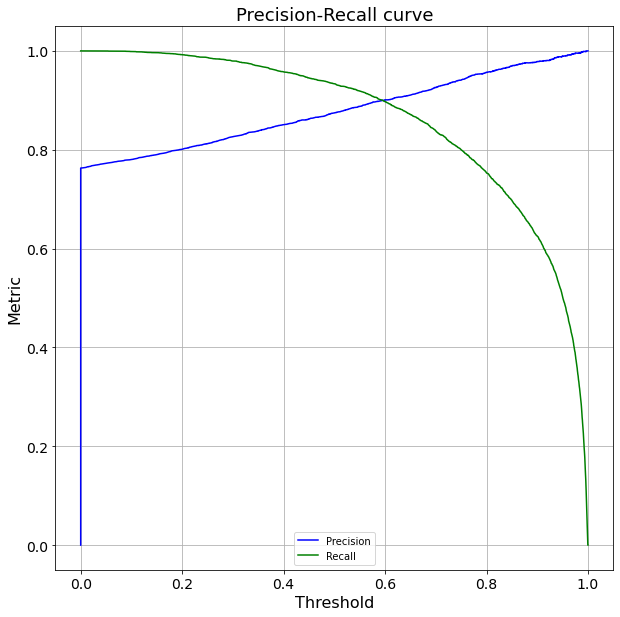

In [252]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_pb[:,1])

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(np.concatenate([np.array([0]), thresholds, np.array([1])]), np.concatenate([np.array([0]), precision]), color='blue', label='Precision')
ax.plot(np.concatenate([np.array([0]), thresholds, np.array([1])]), np.concatenate([np.array([1]), recall]), color='green', label='Recall')

ax.set_title('Precision-Recall curve', fontsize=18)
ax.set_xlabel('Threshold', fontsize=16)
ax.set_ylabel('Metric', fontsize=16)
ax.tick_params(labelsize=14)

plt.legend()
plt.grid('on')
plt.show()

**<font color='blue'>7.b Compute the precision, the recall and the f1-score on the test set predictions for a threshold on 0.25 and 0.75.<br>Interpret the results.**

*Tips: You can use np.where()*

In [255]:
y_pred25 = np.where(y_pred_pb[:,1] < 0.25, 0, 1)
y_pred75 = np.where(y_pred_pb[:,1] < 0.75, 0, 1)

print('Threshold : 0.25')
print(f"Accuracy  : {accuracy_score(y_test, y_pred25):.3%}")
print(f"Precision : {precision_score(y_test, y_pred25):.3%}")
print(f"Recall    : {recall_score(y_test, y_pred25):.3%}")
print(f"f1-score  : {f1_score(y_test, y_pred25):.3%}", end='\n\n')

print('Threshold : 0.75')
print(f"Accuracy  : {accuracy_score(y_test, y_pred75):.3%}",)
print(f"Precision : {precision_score(y_test, y_pred75):.3%}")
print(f"Recall    : {recall_score(y_test, y_pred75):.3%}")
print(f"f1-score  : {f1_score(y_test, y_pred75):.3%}", end='\n\n')

Threshold : 0.25
Accuracy  : 81.669%
Precision : 81.230%
Recall    : 98.644%
f1-score  : 89.094%

Threshold : 0.75
Accuracy  : 81.008%
Precision : 94.116%
Recall    : 79.980%
f1-score  : 86.474%

